In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load dataset
csv_file_path = 'extracted_features.csv'  
df = pd.read_csv(csv_file_path)

# Assume first column is label, remaining are features
X = df.iloc[:, 1:].values  
y = df.iloc[:, 0].values  

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [2]:
from sklearn.cluster import MeanShift

# Apply Mean Shift clustering
ms = MeanShift(bandwidth=2)  # Adjust bandwidth based on dataset
ms.fit(X_scaled)

# Get cluster labels
cluster_labels = ms.labels_
n_clusters = len(set(cluster_labels))

print(f"Number of clusters found: {n_clusters}")


Number of clusters found: 20000


In [4]:
%pip install seaborn

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Combine features with cluster labels
X_clustered = np.hstack((X_scaled, cluster_labels.reshape(-1, 1)))

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_clustered, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Train SVM model
svm = SVC(kernel='rbf', C=1, gamma='scale')
svm.fit(X_train, y_train)

# Predict and evaluate
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"SVM Accuracy (with clustering): {accuracy:.4f}")


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.
SVM Accuracy (with clustering): 0.0138


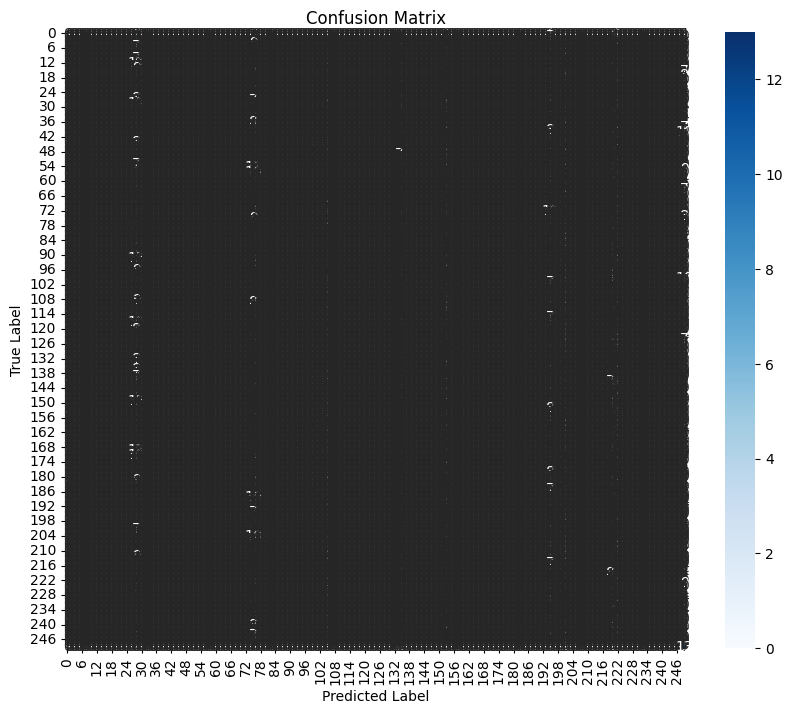

In [5]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
# Detailed Classification Report
print(classification_report(y_test, y_pred))


In [11]:
%pip install xgboost
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)
print("Accuracy:", xgb.score(X_test, y_test))


  Using cached xgboost-3.0.0-py3-none-win_amd64.whl.metadata (2.1 kB)
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 1.3/150.0 MB 8.4 MB/s eta 0:00:18
   - -------------------------------------- 3.9/150.0 MB 10.7 MB/s eta 0:00:14
   - -------------------------------------- 5.5/150.0 MB 9.9 MB/s eta 0:00:15
   -- ------------------------------------- 8.1/150.0 MB 10.3 MB/s eta 0:00:14
   -- ------------------------------------- 10.2/150.0 MB 10.3 MB/s eta 0:00:14
   --- ------------------------------------ 12.6/150.0 MB 10.4 MB/s eta 0:00:14
   --- ------------------------------------ 14.7/150.0 MB 10.3 MB/s eta 0:00:14
   ---- ----------------------------------- 16.3/150.0 MB 9.9 MB/s eta 0:00:14
   ---- ----------------------------------- 18.1/150.0 MB 9.8 MB/s eta 0:00:14
   ----- ---------------------------------- 19.7/150.0 MB 9.6 MB/s eta 0:00:14
   ----- ---------------------------------- 21.5/150.0 MB 9.5 MB/s e